Problem statement - “Predict tip amount based on the total bill.”

### Importing Libraries

In [375]:
from sklearn.linear_model import LinearRegression  # for building model
from sklearn.model_selection import train_test_split # for spliting data
from sklearn.metrics import mean_squared_error      # for error checking in model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   

### Reading dataset

In [377]:
df=sns.load_dataset('tips')

In [378]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [379]:
df.head()   # display 5 rows

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [380]:
df.shape   # used to find shape of data

(244, 7)

<!-- -> total_bill-Total amount of the bill for a table,.
-> tip-The tip amount given by the customer to the server.
-> sex-Gender of the person paying the bill.
-> smoker-Indicates whether anyone in the dining group was a smoker.
-> day-The day of the week when the meal was served.
-> time-Whether it was lunch or dinner time.
-> size-Number of people at the table (group size). -->

### Exploratory data analysis

In [381]:
df.info()   # no null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [382]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [383]:
df.describe()      # statistical summary

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


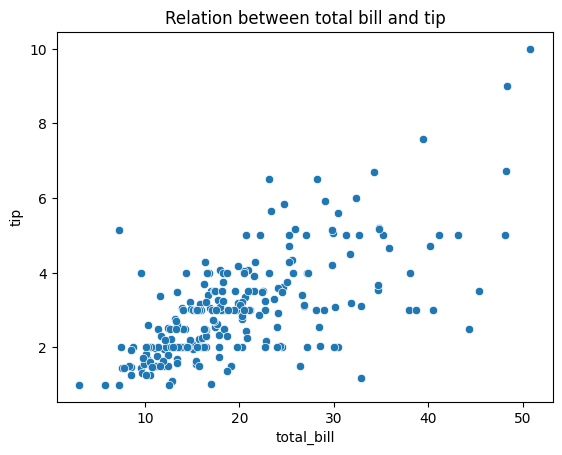

In [384]:
sns.scatterplot(x ='total_bill',y='tip',data=df)
plt.title("Relation between total bill and tip")
plt.show()

# it shows positive correlation.

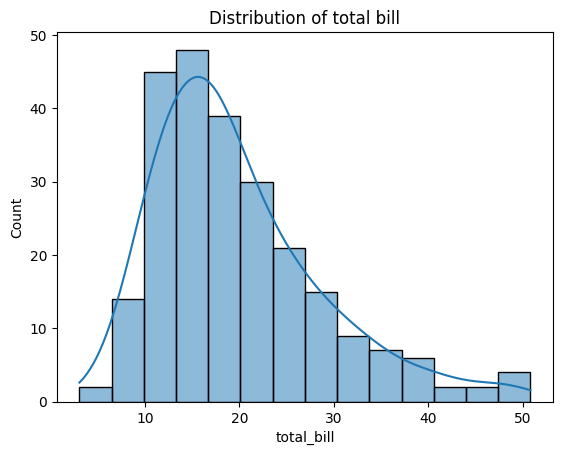

In [385]:
sns.histplot(df['total_bill'],kde=True)
plt.title("Distribution of total bill")
plt.show()

# it shows data is right skewed.

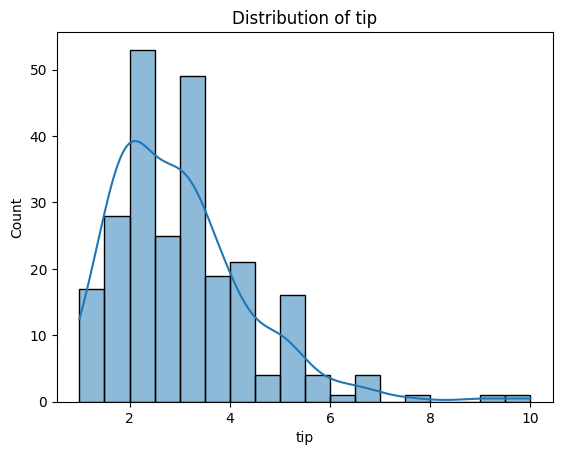

In [386]:
sns.histplot(df['tip'],kde=True)
plt.title("Distribution of tip")
plt.show()

# it shows data is right skewed.

### Data preprocessing

There is no missing values in this dataset.

In [387]:
df.duplicated().sum()  # checking duplicates

np.int64(1)

In [388]:
df.drop_duplicates(inplace=True)    # removing duplicates

In [389]:
df.duplicated().sum()        # checking still any duplicate present or not

np.int64(0)

In [390]:
# separating independent and target variable
X = df.drop('tip',axis = 1)
y = df['tip']

In [391]:
cat_cols = X.select_dtypes(include='category').columns
num_cols = X.select_dtypes(exclude='category').columns

In [393]:
from sklearn.pipeline import Pipeline

In [394]:
num_cols

Index(['total_bill', 'size'], dtype='object')

In [395]:
# spliting the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [396]:
X_train

,total_bill,sex,smoker,day,time,size
115,17.31,Female,No,Sun,Dinner,2
208,24.27,Male,Yes,Sat,Dinner,2
158,13.39,Female,No,Sun,Dinner,2
132,11.17,Female,No,Thur,Lunch,2
84,15.98,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...
106,20.49,Male,Yes,Sat,Dinner,2
14,14.83,Female,No,Sun,Dinner,2
92,5.75,Female,Yes,Fri,Dinner,2
179,34.63,Male,Yes,Sun,Dinner,2


In [397]:
y_train

115    3.50
208    2.03
158    2.61
132    1.50
84     2.03
       ... 
106    4.06
14     3.02
92     1.00
179    3.55
102    2.50
Name: tip, Length: 194, dtype: float64

In [398]:
X_test.shape

(49, 6)

In [399]:
y_test.shape

(49,)

In [400]:
#checking outliers
for col in num_cols:   
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)

    # Calculating IQR
    IQR = Q3-Q1
    upper_limit = Q3+1.5*IQR
    lower_limit = Q1-1.5*IQR

    outliers = X_train[(X_train[col] < lower_limit) | (X_train[col] > upper_limit)]
    print(f"{col} → {len(outliers)} outliers")

    

total_bill → 8 outliers
size → 6 outliers


In [401]:
# Capping of the outliers
for col in num_cols:
    X_train[col] = np.where(X_train[col]<lower_limit,lower_limit,
                np.where(X_train[col]>upper_limit,upper_limit,X_train[col]))

In [402]:
#checking outliers are still present or not
for col in num_cols:   
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)

    # Calculating IQR
    IQR = Q3-Q1
    upper_limit = Q3+1.5*IQR
    lower_limit = Q1-1.5*IQR
    
    outliers = X_train[(X_train[col] < lower_limit) | (X_train[col] > upper_limit)]
    print(f"{col} → {len(outliers)} outliers")

total_bill → 0 outliers
size → 0 outliers


In [403]:
from sklearn.preprocessing import FunctionTransformer

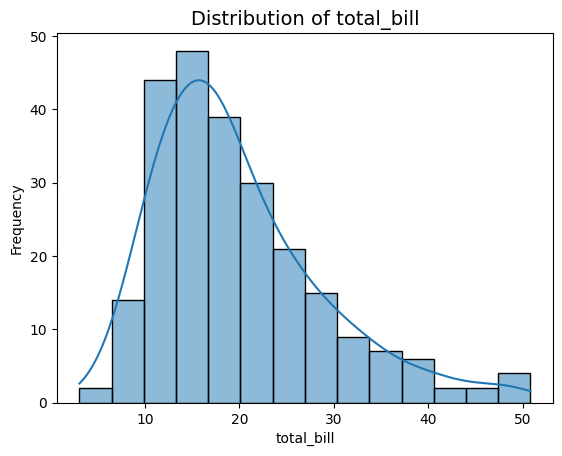

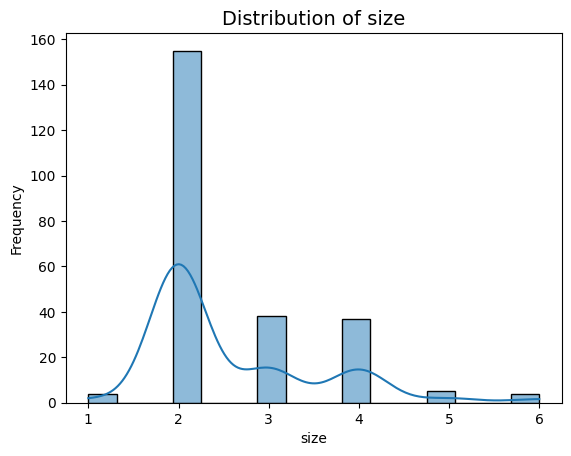

In [404]:
# checking which data is left or right skewed
import matplotlib.pyplot as plt
for col in num_cols:
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [405]:
log = FunctionTransformer(np.log1p)
log.fit(X[['total_bill']])

,func,<ufunc 'log1p'>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [406]:
X_train['total_bill']= log.transform(X[['total_bill']])

<Axes: xlabel='total_bill', ylabel='Count'>

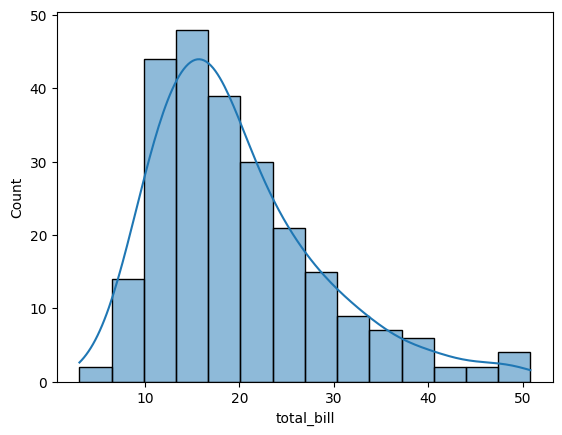

In [407]:
sns.histplot(X['total_bill'],kde=True)

pipeline

In [408]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [409]:
cat_col_pipeline = Pipeline(steps=[
    ("encode",OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [410]:
cat_col_pipeline.fit(X_train[cat_cols])

,steps,"[('encode', ...)]"
,transform_input,None
,memory,None
,verbose,False
,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None


In [411]:
cat_transformed = pd.DataFrame(cat_col_pipeline.transform(X_train[cat_cols]))
cat_transformed

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
189,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
190,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
191,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
192,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [412]:
num_col_pipeline = Pipeline(steps=[
    ("scaler",StandardScaler())
])

In [413]:
num_col_pipeline.fit(X_train[num_cols])

,steps,"[('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True


In [414]:
num_transformed = pd.DataFrame(num_col_pipeline.transform(X_train[num_cols]))
num_transformed

,0,1
0,-0.158924,-0.665550
1,0.671470,-0.665550
2,-0.779879,-0.665550
3,-1.211764,-0.665550
4,-0.353297,-0.665550
...,...,...
189,0.253837,-0.665550
190,-0.534055,-0.665550
191,-2.731023,-0.665550
192,1.557021,-0.665550


In [415]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_col_pipeline, num_cols),
        ("cat", cat_col_pipeline, cat_cols),
    ]
)

In [416]:
preprocessor.fit(X_train)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [417]:
Transformed_data = pd.DataFrame(preprocessor.transform(X_train))
Transformed_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.158924,-0.665550,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.671470,-0.665550,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.779879,-0.665550,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.211764,-0.665550,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.353297,-0.665550,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.253837,-0.665550,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
190,-0.534055,-0.665550,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
191,-2.731023,-0.665550,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
192,1.557021,-0.665550,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### Building the model

In [441]:
from sklearn.linear_model import LinearRegression

In [442]:
model_pipeline = Pipeline(
    steps=[
        ('data_preprocessing',preprocessor),
        ('model',LinearRegression())
    ]
)

In [443]:
X_train.columns

Index(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [444]:
model_pipeline.fit(X_train, y_train)


,steps,"[('data_preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [445]:
y_pred = model_pipeline.predict(X_test)
print("Predictions on test data completed.")

Predictions on test data completed.


In [446]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [447]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.6500878425970916

In [448]:
mse = mean_squared_error(y_test, y_pred)
mse

0.6672932810998187

In [449]:
r2 = r2_score(y_test, y_pred)
r2

0.46615313733117325

In [433]:
coefficients = model_pipeline.named_steps['model'].coef_
print(coefficients)


[ 0.72242504  0.22605418 -0.00294351  0.00294351  0.01211728 -0.01211728
  0.00348156  0.02245983  0.08422434 -0.11016573 -0.10406346  0.10406346]


In [434]:
intercept = model_pipeline.named_steps['model'].intercept_
print("Intercept:", intercept)


Intercept: 3.0690911930079428


In [435]:
custom_value = pd.DataFrame([[30,'female','No','Sun','Dinner',2]], columns=['total_bill','sex','smoker','day','time','size'])
custome_prediction = model_pipeline.predict(custom_value)
custome_prediction

array([53.24378231])

In [436]:
comparison = pd.DataFrame({
    "Actual Tip": y_test[:10].values,
    "Predicted Tip": y_pred[:10]
})

print(comparison)


   Actual Tip  Predicted Tip
0        3.18      34.229297
1        2.00      13.715415
2        2.74      29.791989
3        1.47      17.377749
4        5.92      51.646547
5        3.11      58.622435
6        3.00      50.519258
7        2.50      23.584277
8        3.23      24.906332
9        2.55      41.981326


<Axes: xlabel='total_bill', ylabel='tip'>

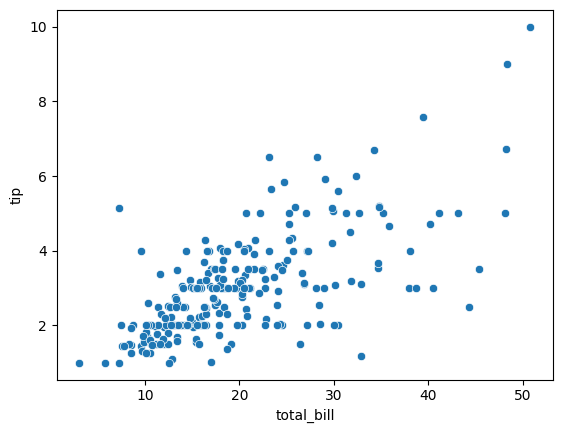

In [437]:
sns.scatterplot(x='total_bill',y='tip',data=df)

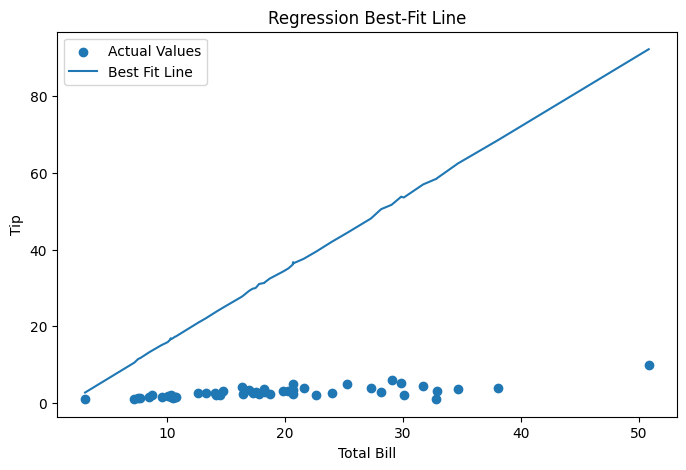

In [438]:
import matplotlib.pyplot as plt
import numpy as np

# Sort values for a smooth line
X_test_sorted = X_test.copy()
X_test_sorted['y_pred'] = y_pred
X_test_sorted = X_test_sorted.sort_values('total_bill')

plt.figure(figsize=(8, 5))
plt.scatter(X_test['total_bill'], y_test, label="Actual Values")
plt.plot(X_test_sorted['total_bill'], X_test_sorted['y_pred'], label="Best Fit Line")

plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Regression Best-Fit Line")
plt.legend()
plt.show()


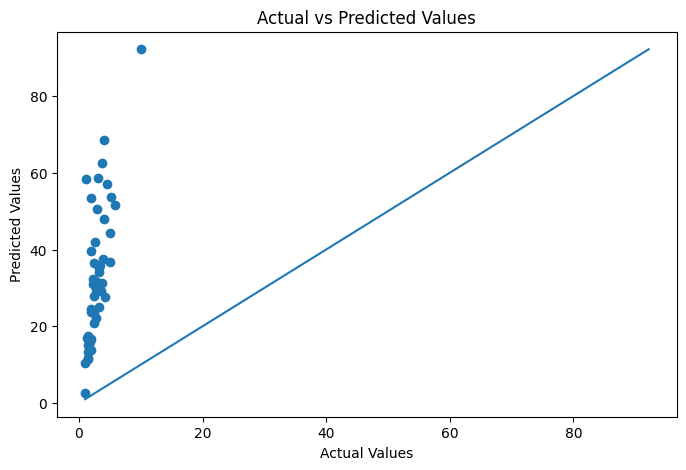

In [439]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# 45-degree reference line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])

plt.show()


In [440]:
# Importing libraries
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


# ----------------------------------------------------------
# 1. Load dataset
# ----------------------------------------------------------
tips = sns.load_dataset("tips")

# Target variable: tip
# Feature: everything else
X = tips.drop("tip", axis=1)
y = tips["tip"]


# ----------------------------------------------------------
# 2. Outlier Capping Function (IQR method)
# ----------------------------------------------------------
def cap_outliers(df, cols):
    df = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_cap = Q1 - 1.5 * IQR
        upper_cap = Q3 + 1.5 * IQR
        
        df[col] = np.where(df[col] < lower_cap, lower_cap,
                   np.where(df[col] > upper_cap, upper_cap, df[col]))
    return df


# Numerical columns
num_cols = ["total_bill", "size"]

# Apply capping on X only
X_capped = cap_outliers(X, num_cols)


# ----------------------------------------------------------
# 3. Column Transformer
# ----------------------------------------------------------
numeric_features = num_cols  
categorical_features = ["sex", "smoker", "day", "time"]

numeric_transformer = "passthrough"  # numeric already cleaned
categorical_transformer = OneHotEncoder(drop="first")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


# ----------------------------------------------------------
# 4. Build Pipeline
# ----------------------------------------------------------
model_pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", LinearRegression())
    ]
)


# ----------------------------------------------------------
# 5. Train-test split & model training
# ----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_capped, y, test_size=0.2, random_state=42
)

model_pipeline.fit(X_train, y_train)


# ----------------------------------------------------------
# 6. Predictions & Evaluation
# ----------------------------------------------------------
y_pred = model_pipeline.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


# ----------------------------------------------------------
# 7. Extract Coefficients & Intercept
# ----------------------------------------------------------
# Get transformed feature names
cat_columns = model_pipeline.named_steps["preprocessing"] \
    .named_transformers_["cat"] \
    .get_feature_names_out(categorical_features)

all_features = numeric_features + list(cat_columns)

# Model coefficients
coeff = model_pipeline.named_steps["model"].coef_

print("\nFeature Coefficients:")
for f, c in zip(all_features, coeff):
    print(f"{f}: {c}")

# Intercept
print("\nIntercept:", model_pipeline.named_steps["model"].intercept_)


MSE: 0.6672932810998187
R² Score: 0.46615313733117325

Feature Coefficients:
total_bill: 0.09452692591049196
size: 0.2768208301585233
sex_Male: 0.035636847141973474
smoker_Yes: -0.18336205178114467
day_Sat: -0.1563931913324097
day_Sun: -0.061406875673268135
day_Thur: -0.16532811671227376
time_Lunch: 0.10104685147223454

Intercept: 0.6256850368447067
